In [3]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [9]:
import nengo

period = 1.0

with nengo.Network() as model:
    osc = nengo.Network()
    osc.config[nengo.Ensemble].neuron_type = nengo.LIFRate()
    nengo.networks.Oscillator(0.1, 2*np.pi/period, 300, net=osc)
    bump = nengo.Node(lambda t: 1 if t < 0.1 else 0)
    nengo.Connection(bump, osc.ensemble[0])
    
    p_osc = nengo.Probe(osc.ensemble, synapse=0.01)

In [10]:
with nengo.Simulator(model) as sim:
    sim.run(2.0)

Simulation finished in 0:00:01.                                                 


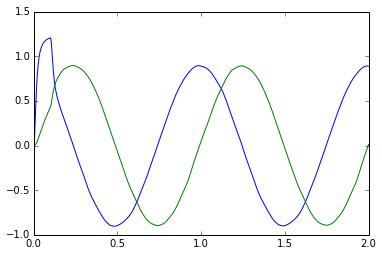

In [11]:
pylab.figure()
pylab.plot(sim.trange(), sim.data[p_osc])
pylab.show()